In [38]:
# python -m pip install prophet
from prophet import Prophet
import pandas as pd
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

In [60]:
df = pd.read_json('../static/playlist_metrics.json')
df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,ts,tick,tag,playlist,error.status,error.message
0,0.565,0.636,0,-8.198,1,0.0638,0.107,0.00001,0.447,0.525,170.01,audio_features,76OGwb5RA9h4FxQPT33ekc,spotify:track:76OGwb5RA9h4FxQPT33ekc,https://api.spotify.com/v1/tracks/76OGwb5RA9h4...,https://api.spotify.com/v1/audio-analysis/76OG...,179551,4,2023-08-23 23:29:56.273282,0,Calm,37i9dQZF1DXcjpPPxCzYRE,,
1,0.681,0.372,5,-8.237,1,0.0432,0.64,0,0.169,0.476,91.873,audio_features,1mXVgsBdtIVeCLJnSnmtdV,spotify:track:1mXVgsBdtIVeCLJnSnmtdV,https://api.spotify.com/v1/tracks/1mXVgsBdtIVe...,https://api.spotify.com/v1/audio-analysis/1mXV...,201000,4,2023-08-23 23:29:56.454426,1,Calm,37i9dQZF1DXcjpPPxCzYRE,,
2,0.686,0.127,7,-14.361,1,0.0342,0.754,0.000014,0.0573,0.372,93.699,audio_features,5jgFfDIR6FR0gvlA56Nakr,spotify:track:5jgFfDIR6FR0gvlA56Nakr,https://api.spotify.com/v1/tracks/5jgFfDIR6FR0...,https://api.spotify.com/v1/audio-analysis/5jgF...,138387,4,2023-08-23 23:29:56.646339,2,Calm,37i9dQZF1DXcjpPPxCzYRE,,
3,0.738,0.482,6,-8.917,0,0.0402,0.0266,0.621,0.106,0.352,93.457,audio_features,23khhseCLQqVMCIT1WMAns,spotify:track:23khhseCLQqVMCIT1WMAns,https://api.spotify.com/v1/tracks/23khhseCLQqV...,https://api.spotify.com/v1/audio-analysis/23kh...,285014,4,2023-08-23 23:29:56.867494,3,Calm,37i9dQZF1DXcjpPPxCzYRE,,
4,0.668,0.26,7,-14.256,1,0.0523,0.453,0,0.0621,0.368,119.416,audio_features,5b7OgznPJJr1vHNYGyvxau,spotify:track:5b7OgznPJJr1vHNYGyvxau,https://api.spotify.com/v1/tracks/5b7OgznPJJr1...,https://api.spotify.com/v1/audio-analysis/5b7O...,147000,4,2023-08-23 23:29:57.079366,4,Calm,37i9dQZF1DXcjpPPxCzYRE,,


In [61]:
df.dropna(inplace=True)
df['ts'] = df['ts'].str.split('.').str[0]
df['ts'] = pd.to_datetime(df['ts'])     


18:26:42 - cmdstanpy - INFO - Chain [1] start processing


Forecasting danceability


18:26:42 - cmdstanpy - INFO - Chain [1] done processing


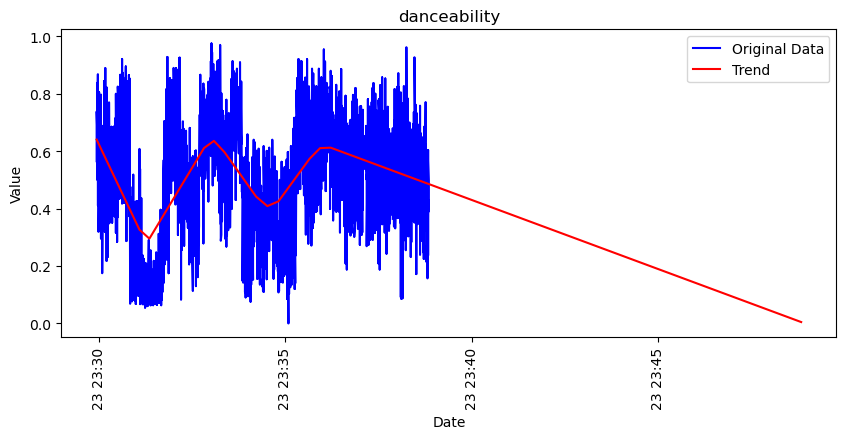

18:26:43 - cmdstanpy - INFO - Chain [1] start processing


Forecasting energy


18:26:43 - cmdstanpy - INFO - Chain [1] done processing


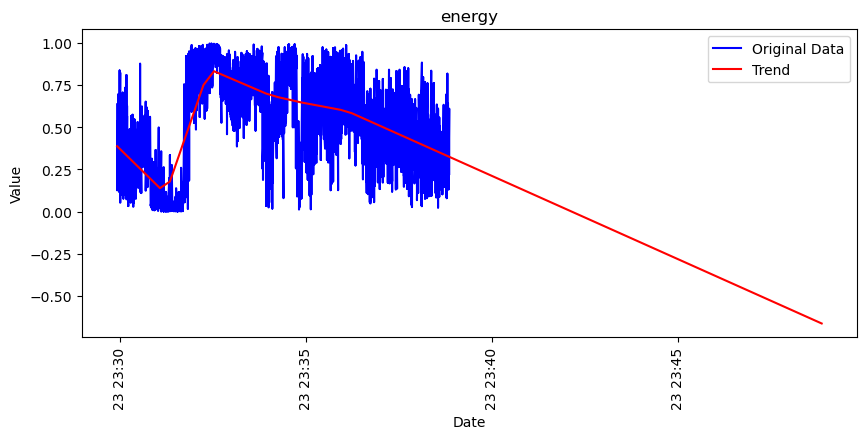

18:26:44 - cmdstanpy - INFO - Chain [1] start processing


Forecasting loudness


18:26:45 - cmdstanpy - INFO - Chain [1] done processing


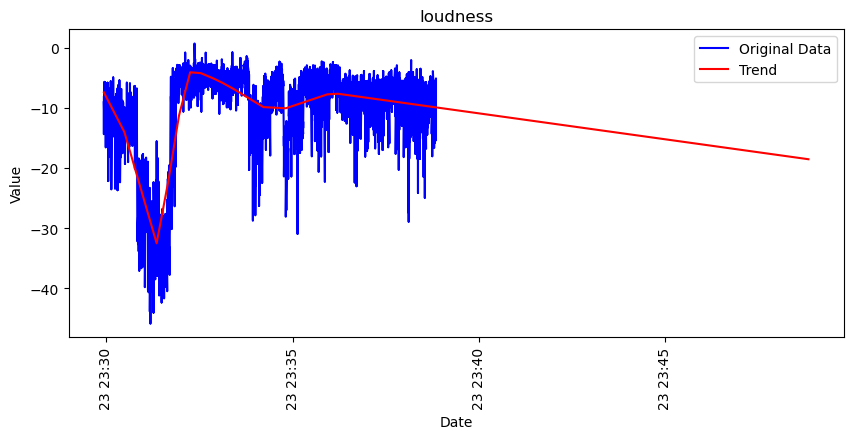

18:26:45 - cmdstanpy - INFO - Chain [1] start processing


Forecasting mode


18:26:46 - cmdstanpy - INFO - Chain [1] done processing


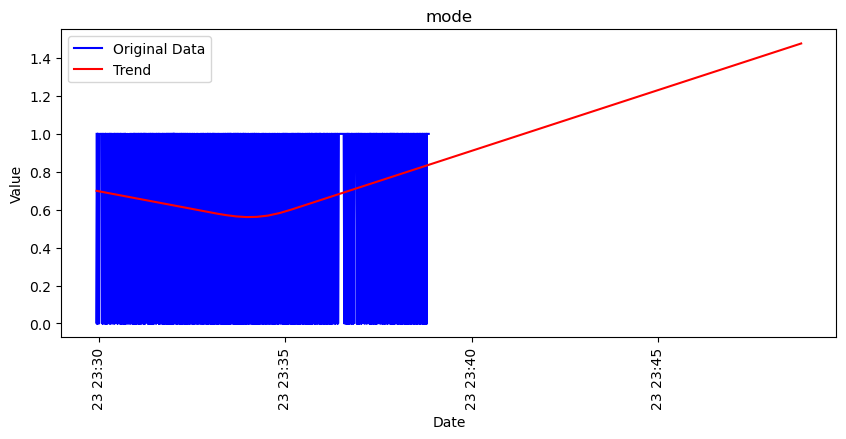

18:26:46 - cmdstanpy - INFO - Chain [1] start processing


Forecasting speechiness


18:26:47 - cmdstanpy - INFO - Chain [1] done processing


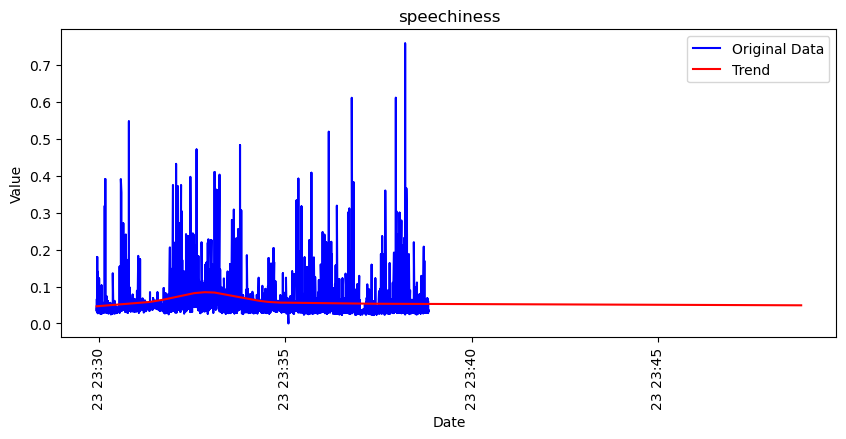

18:26:47 - cmdstanpy - INFO - Chain [1] start processing


Forecasting acousticness


18:26:47 - cmdstanpy - INFO - Chain [1] done processing


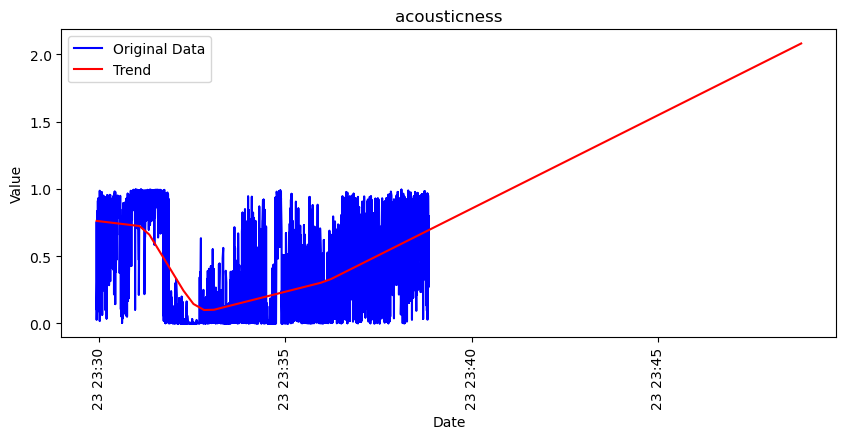

18:26:48 - cmdstanpy - INFO - Chain [1] start processing


Forecasting instrumentalness


18:26:48 - cmdstanpy - INFO - Chain [1] done processing


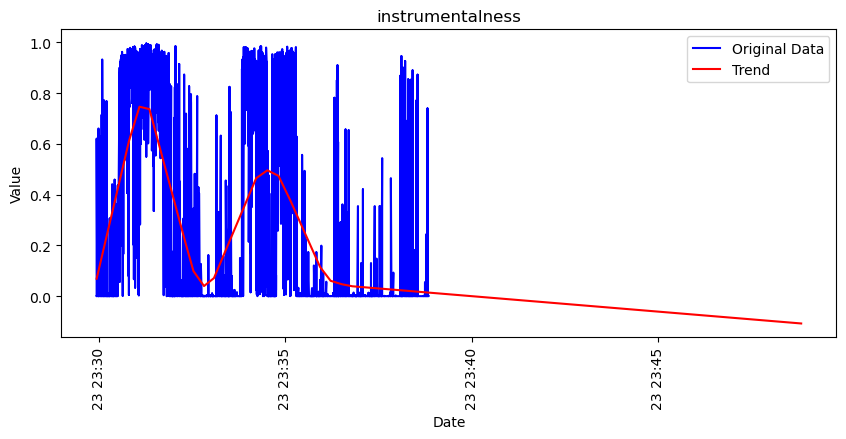

18:26:49 - cmdstanpy - INFO - Chain [1] start processing


Forecasting liveness


18:26:49 - cmdstanpy - INFO - Chain [1] done processing


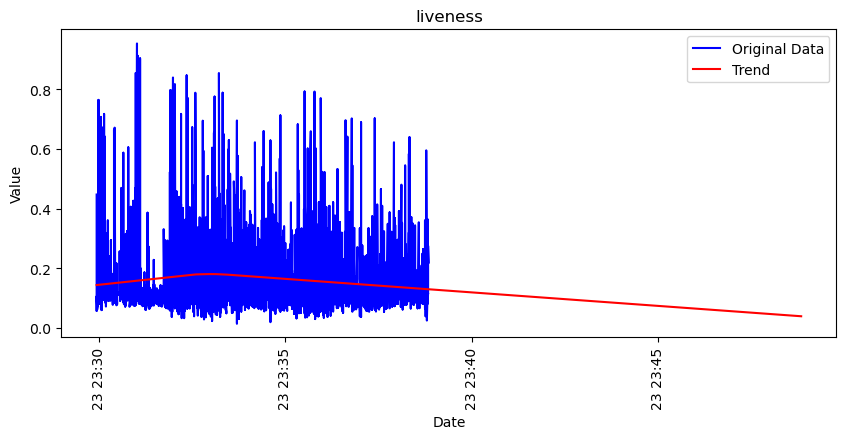

18:26:50 - cmdstanpy - INFO - Chain [1] start processing


Forecasting valence


18:26:50 - cmdstanpy - INFO - Chain [1] done processing


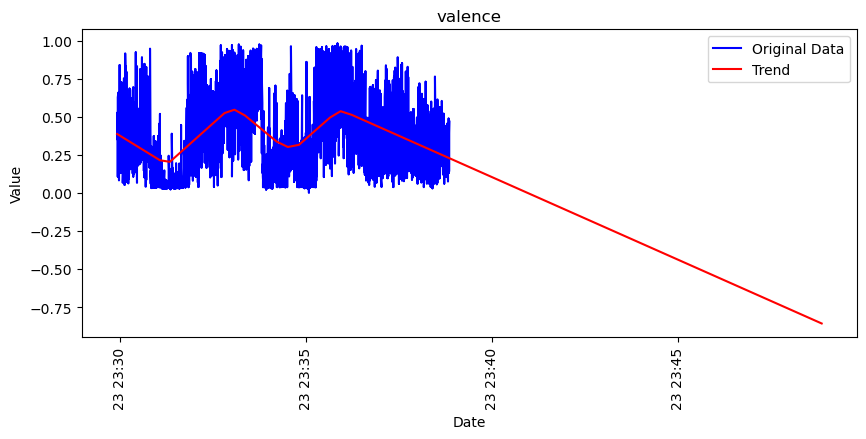

18:26:51 - cmdstanpy - INFO - Chain [1] start processing


Forecasting tempo


18:26:51 - cmdstanpy - INFO - Chain [1] done processing


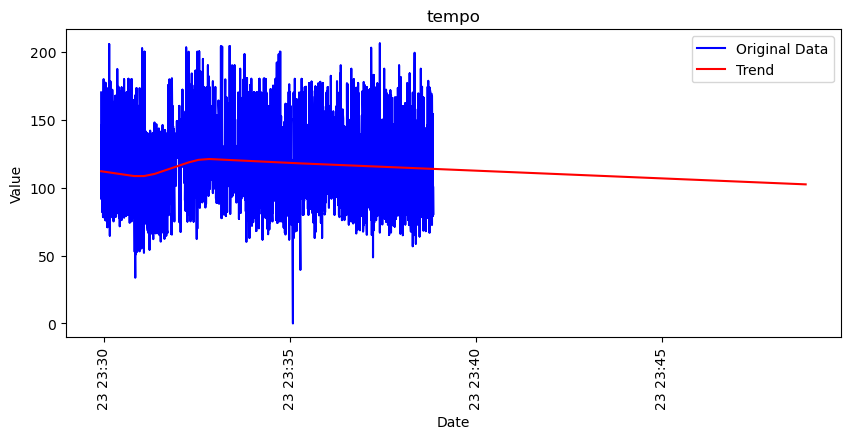

18:26:52 - cmdstanpy - INFO - Chain [1] start processing


Forecasting duration_ms


18:26:52 - cmdstanpy - INFO - Chain [1] done processing


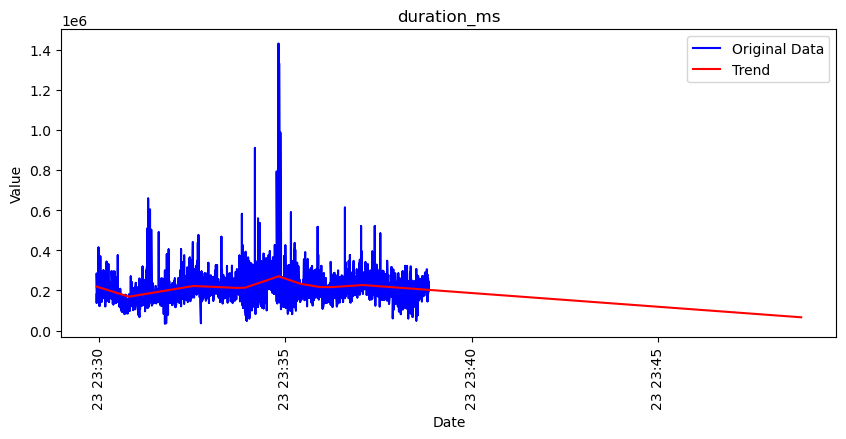

In [64]:
prediction = {}
for col in ['danceability','energy','loudness','mode','speechiness','acousticness','instrumentalness','liveness','valence','tempo','duration_ms']:
    
    print('Forecasting ' + str(col))
    # force to numeric values
    df[col] = pd.to_numeric(df[col], errors='coerce')
    
    # data for forecasting
    data = df[['ts',col]]
    data = data.rename(columns={'ts':'ds',col:'y' })

    # prepare Prophet & predict
    model = Prophet()
    model.fit(data)
    future = model.make_future_dataframe(periods=10, freq='1min')
    forecast = model.predict(future)
    trend = forecast['trend']
    prediction[col] = forecast.loc[forecast.index[-1], 'trend']


    # Plots
    fig, ax = plt.subplots(figsize=(10,4))
    ax.plot(data['ds'], data['y'], label='Original Data', color='blue')
    ax.plot(forecast['ds'], forecast['trend'], label='Trend', color='red')    
    # Plot Configuration
    ax.legend()
    ax.set_xlabel('Date')
    ax.set_ylabel('Value')
    # plt.title('Trend with forecast')
    plt.title(col)
    plt.xticks(rotation=90)    
    plt.show()
    

    
